<a href="https://colab.research.google.com/github/gstripling00/conferences/blob/main/ODSC_23_predict_media_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Neural Network using Keras


## Introduction
Our use case is to build, train, and evaluate a prediction model for sales analysis.

In this model, we need to feed the advertising budget of TV, radio, and newspapers to the model and the model will forecast the possible sales.

## Dataset
The dataset being used for this chapter, the advertising_2023 dataset, is based on data taken from An Introduction to Statistical Learning with Applications in R by Daniela Witten, Gareth M. James, Trevor Hastie, and Robert Tibshirani (Springer, 2021). The advertising dataset captures the sales revenue generated from advertising (in thousands of units) for particular product advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.

For this exercise, the dataset has been updated to include a digital variable and modified to show the impact of digital budgets on sales. The number of markets has been increased from 200 to 1,200. Thus, the data consists of the advertising budgets for four media channels (digital, TV, radio, and newspapers) and the overall sales in 1,200 different markets.

   
&nbsp;
&nbsp;

##### Features:
| Channel    | Description |
| --------   | ------- |
| Digital    | Advertising dollars spent on Internet   |
| TV         | Advertising dollars spent on TV    |
| Radio      | Advertising dollars spent on Radio   |

&nbsp;
&nbsp;


#### Target (Label): Sales budget


# Step 1: Import Libraries and Data Preparation

### Import Libraries

In [27]:
# Import the necessary libraries

# For Data loading, Exploraotry Data Analysis, Graphing
import pandas as pd   # Pandas for data processing libraries
import numpy as np    # Numpy for mathematical functions

import matplotlib.pyplot as plt # Matplotlib for visualization tasks
import seaborn as sns # Seaborn for data visualization library based on matplotlib.
%matplotlib inline

import sklearn        # ML tasks
from sklearn.model_selection import train_test_split # Split the dataset
from sklearn.metrics import mean_squared_error  # Calculate Mean Squared Error

# Build the Network
from tensorflow import keras
from keras.models import Sequential
#from tensorflow.keras.models import Sequential
from keras.layers import Dense

import tensorflow as tf


In [28]:

# Next, you read the dataset into a Pandas dataframe.
# A Pandas DataFrame is a two-dimensional tabular data structure with labeled axes (rows and columns)

url = 'https://github.com/maabel0712/low-code-ai/blob/main/advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [29]:
# Backup dataset
# Next, you read the dataset into a Pandas dataframe.

url = 'https://github.com/LinkedInLearning/artificial-intelligence-foundations-neural-networks-4381282/blob/main/Advertising_2023.csv?raw=true'
advertising_df= pd.read_csv(url,index_col=0)

In [30]:
# Pandas info() function is used to get a concise summary of the dataframe.
advertising_df.info()

# Think of float64 data type as a decimal - remenber, in sales, we have dollars and cents.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1199 entries, 1 to 1197
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   digital    1199 non-null   float64
 1   TV         1199 non-null   float64
 2   radio      1199 non-null   float64
 3   newspaper  1199 non-null   float64
 4   sales      1199 non-null   float64
dtypes: float64(5)
memory usage: 56.2 KB


In [31]:
### Get summary of statistics of the data
advertising_df.describe()

,digital,TV,radio,newspaper,sales
count,1199.000000,1199.00000,1199.000000,1199.000000,1199.000000
mean,135.472394,146.61985,23.240617,30.529942,14.005505
std,135.730821,85.61047,14.820827,21.712507,5.202804
min,0.300000,0.70000,0.000000,0.300000,1.600000
25%,24.250000,73.40000,9.950000,12.800000,10.300000
50%,64.650000,149.70000,22.500000,25.600000,12.900000
75%,256.950000,218.50000,36.500000,45.100000,17.400000
max,444.600000,296.40000,49.600000,114.000000,27.000000


In [32]:
#shape of dataframe - 1199 rows, five columns
advertising_df.shape

(1199, 5)

Let's check for any null values.

In [33]:
# The isnull() method is used to check and manage NULL values in a data frame.
advertising_df.isnull().sum()

digital      0
TV           0
radio        0
newspaper    0
sales        0
dtype: int64

## Exploratory Data Analysis (EDA)

Let's create some simple plots to check out the data!  

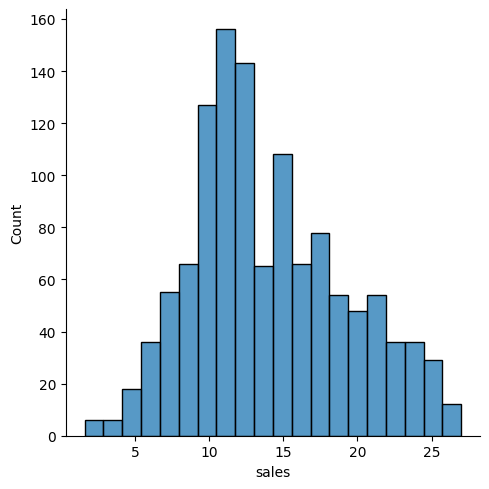

In [34]:
sns.displot(advertising_df, x="sales")

#Note the mean value is around 14 (as shown above in the .describe() method.

In [35]:
advertising_df.corr()

,digital,TV,radio,newspaper,sales
digital,1.000000,0.474256,0.041316,0.048023,0.380101
TV,0.474256,1.000000,0.055697,0.055579,0.781824
radio,0.041316,0.055697,1.000000,0.353096,0.576528
newspaper,0.048023,0.055579,0.353096,1.000000,0.227039
sales,0.380101,0.781824,0.576528,0.227039,1.000000


<Axes: >

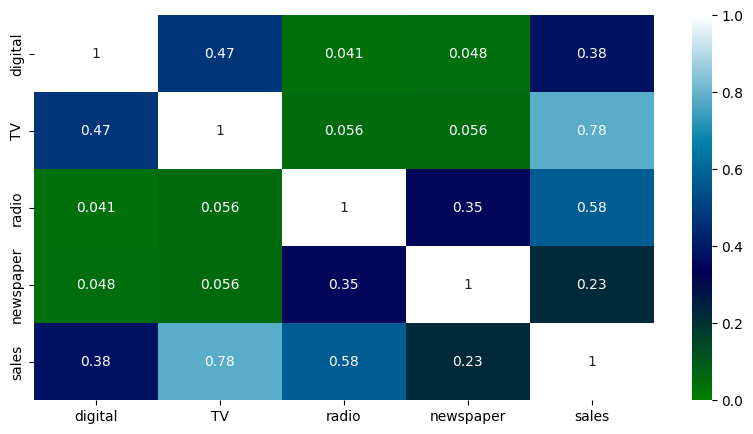

In [36]:
## Plot the heatmap so that the values are shown.

plt.figure(figsize=(10,5))
sns.heatmap(advertising_df.corr(),annot=True,vmin=0,vmax=1,cmap='ocean')


<Axes: xlabel='[digital]', ylabel='sales'>

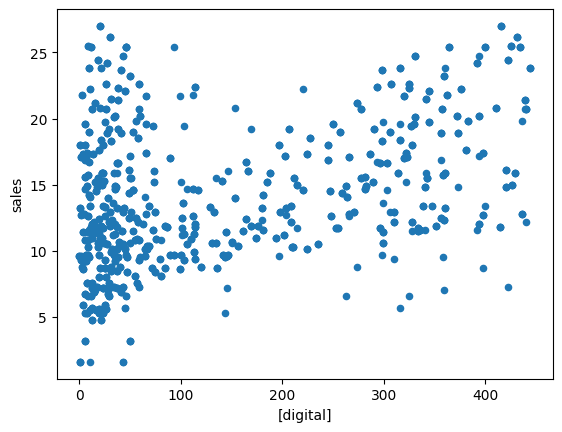

In [37]:
# Scatter Plot
# Relationship between digital and sales.

                                                                                #Scatter Plot
advertising_df.plot(kind='scatter', x=['digital'], y='sales')

## Training a Linear Regression Model

Regression is a supervised machine learning process.  It is similar to classification, but rather than predicting a label, you try to predict a continuous value.   Linear regression defines the relationship between a target variable (y) and a set of predictive features (x).  Simply stated, If you need to predict a number, then use regression.

Let's now begin to train your regression model! You will need to first split up your data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. You will toss out the Address column because it only has text info that the linear regression model can't use.

#### Data Preprocessing

##### Split: X (features) and y (target)
Next, let's define the features and label.  Briefly, feature is input; label is output. This applies to both classification and regression problems.

In [38]:
X = advertising_df[['digital', 'TV', 'radio', 'newspaper']]
y = advertising_df['sales']

# print (X)
# print (y)

##### Scaling (Normalization)

In [39]:
'''=== Noramlization the features. Since it is seen that features have different ranges, it is best practice to
normalize/standarize the feature before using them in the model ==='''

#feature normalization
normalized_feature =  keras.utils.normalize(X.values)

#What is the normalize function in Keras?
# The normalize function just performs a regular normalization to improve performance:
# Normalization is a rescaling of the data from the original range so that all values
#are within the range of 0 and 1.

print(normalized_feature)



[[0.89211961 0.4032179  0.0977028  0.17886333]
 [0.66254734 0.45658693 0.39008405 0.44765371]
 [0.29009225 0.20576311 0.51609436 0.77920128]
 ...
 [0.06744611 0.99272247 0.05163843 0.08536149]
 [0.19480049 0.91868871 0.08898294 0.33188231]
 [0.06744611 0.99272247 0.05163843 0.08536149]]


##### Train - Test - Split

Now let's split the data into a training and test set.  Note:  Best pracices is to split into three - training, validation, and test set.

By default - It splits the given data into 75-25 ratio


In [40]:
# Import train_test_split function from sklearn.model_selection
from sklearn.model_selection import train_test_split

# Split up the data into a training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# If you don't specify the random_state in the code, then every time you run(execute) your code
# a new random value is generated and the train and test datasets would have different values each time.
# if a fixed value is assigned like random_state = 0 or 1 or 42 or any other integer then no
# matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

In [41]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape )

(719, 4) (480, 4) (719,) (480,)


# Step 2:  Build Network


#### Build and Train the Network

In [42]:
## Build Model (Building a three layer network - with one hidden layer)
model = Sequential()
model.add(Dense(4,input_dim=4, activation='relu'))                                                  # You don't have to specify input size.Just define the hidden layers
model.add(Dense(3,activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam', loss='mse',metrics=['mse'])

#  Fit the Model
history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                    epochs = 32)



Epoch 1/32
23/23 [==============================] - 1s 15ms/step - loss: 1173.2151 - mse: 1173.2151 - val_loss: 891.9005 - val_mse: 891.9005
Epoch 2/32
23/23 [==============================] - 0s 5ms/step - loss: 717.7853 - mse: 717.7853 - val_loss: 556.7170 - val_mse: 556.7170
Epoch 3/32
23/23 [==============================] - 0s 8ms/step - loss: 471.6368 - mse: 471.6368 - val_loss: 372.1472 - val_mse: 372.1472
Epoch 4/32
23/23 [==============================] - 0s 7ms/step - loss: 339.4006 - mse: 339.4006 - val_loss: 269.4370 - val_mse: 269.4370
Epoch 5/32
23/23 [==============================] - 0s 6ms/step - loss: 264.4662 - mse: 264.4662 - val_loss: 215.0347 - val_mse: 215.0347
Epoch 6/32
23/23 [==============================] - 0s 5ms/step - loss: 221.0227 - mse: 221.0227 - val_loss: 181.4782 - val_mse: 181.4782
Epoch 7/32
23/23 [==============================] - 0s 4ms/step - loss: 191.7963 - mse: 191.7963 - val_loss: 161.0888 - val_mse: 161.0888
Epoch 8/32
23/23 [=============

### Visualization

You can add more 'flavor' to the graph by making it bigger and adding labels and names, as shown below.

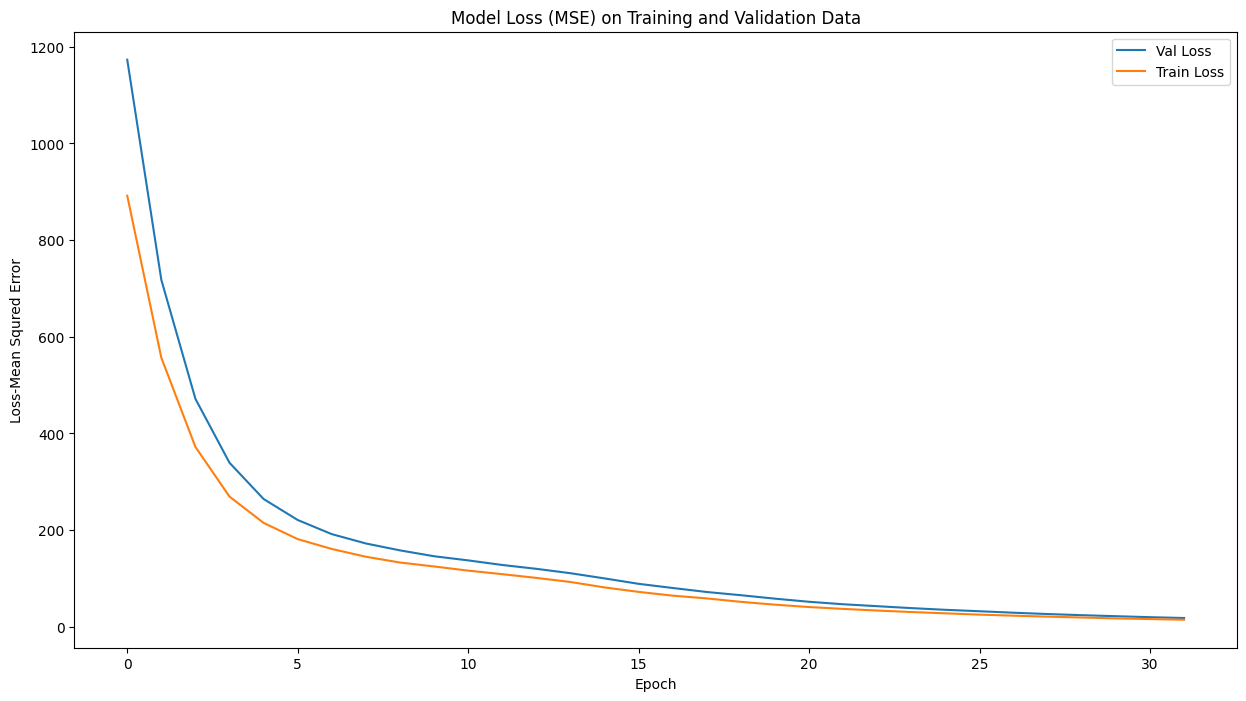

In [43]:
## Plot a graph of model loss # show the graph of model loss in trainig and validation

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss (MSE) on Training and Validation Data')
plt.ylabel('Loss-Mean Squred Error')
plt.xlabel('Epoch')
plt.legend(['Val Loss', 'Train Loss'], loc='upper right')
plt.show()



### Predict Sales

In [44]:
'''=== predict the SALES =='''

# predict SALES using the test data
test_predictions = model.predict(X_test).flatten()
print(test_predictions)

15/15 [==============================] - 0s 6ms/step
[27.386467   18.981003   18.028036   24.661524   16.557579   26.41734
 10.502865   22.625837   22.71591    17.355976    3.2051947  17.91398
  4.421696    9.155335   11.340993    6.063675   23.385324   10.964839
  4.1812963  15.306601   14.308649    3.6066284  11.874997   13.293087
 10.178971    1.6485468  10.414904   22.319109   15.335258    8.031826
 14.626667   16.722584   20.498245   20.915436   26.01556    34.08878
 22.290255   16.435425   16.235762   14.755372   19.094454   18.360746
  6.790531    8.960734    8.7535925  15.251198    7.9714117  22.290255
 10.410218    7.208777   10.629884   11.340993   11.343002   18.253113
  2.8784046  17.415064   15.098404   21.162014    5.4747944  15.837936
  9.772838   13.480266   10.7135515  16.02711     6.985573   12.357959
 10.126631   19.13411     7.1922307  23.17909     3.7243268  27.347914
  7.3106775  23.492266   17.218267   20.07505    19.518692   11.630165
 16.722584   17.828754   18

### True and Predicted Values

In [45]:
# show the true value and predicted value in dataframe
true_predicted = pd.DataFrame(list(zip(y_test, test_predictions)),
                    columns=['True Value','Predicted Value'])
true_predicted.head(6) # Show first six rows

,True Value,Predicted Value
0,26.2,27.386467
1,19.0,18.981003
2,12.8,18.028036
3,20.8,24.661524
4,16.9,16.557579
5,23.8,26.417339


### Visualize the Prediction

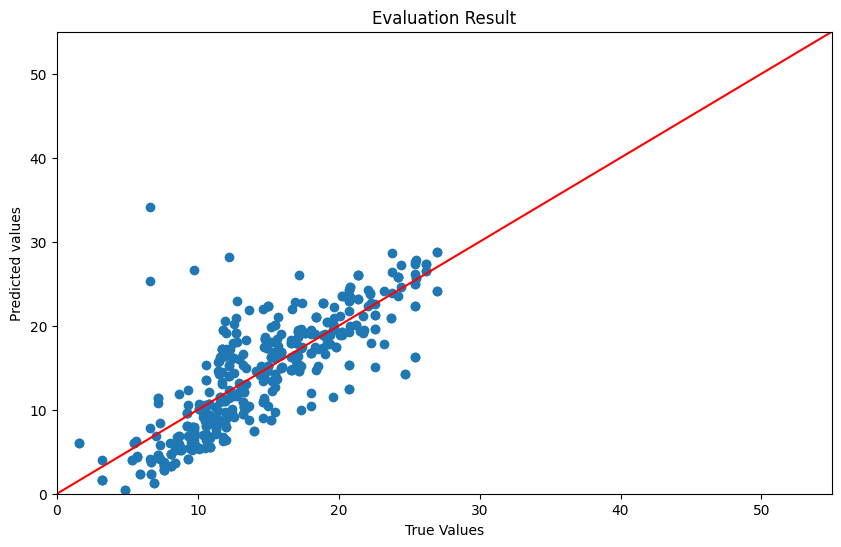

In [46]:
# visualize the prediction uisng diagonal line
y = test_predictions #y-axis
x = y_test #x-axis
fig, ax = plt.subplots(figsize=(10,6)) # create figure
ax.scatter(x,y) #scatter plots for x,y
ax.set(xlim=(0,55), ylim=(0, 55)) #set limit
ax.plot(ax.get_xlim(), ax.get_ylim(), color ='red') # draw 45 degree diagonal in figure
plt.xlabel('True Values')
plt.ylabel('Predicted values')
plt.title('Evaluation Result')
plt.show()

Show the accuracy of Linear Regression on the dataset. The linear regression graph is created by train data and the model line is shown by the blue line which is created using test data and predicted data as we can see most of the red dots are on the line, thus we can say that model has produced the best-fit line.

<Axes: xlabel='sales'>

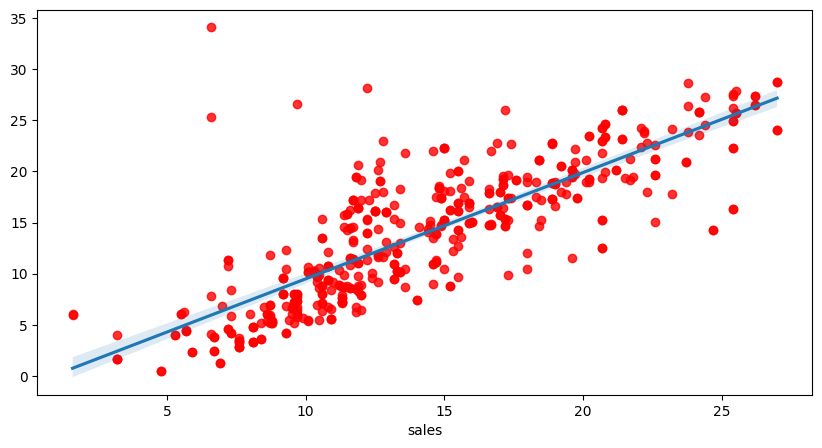

In [47]:
#Accuracy of linear regression on the dataset


plt.figure(figsize=(10,5))
sns.regplot(x=y_test,y=test_predictions,scatter_kws={'color':'red'})

### Evaluation

Step 6 - Predict on the Test Data and Compute Evaluation Metrics The first line of code predicts on the train data, while the second line prints the RMSE value on the train data. The same is repeated in the third and fourth lines of code which predicts and prints the RMSE value on test data.

In [48]:
pred_train= model.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred)))

23/23 [==============================] - 0s 3ms/step
4.1399556601300445
15/15 [==============================] - 0s 3ms/step
3.8385426716033084


In [49]:
# How can I get prediction for only one instance in Keras?
# We were able to do that quite easily using the AutoML GUI.

# See this resources: https://datascience.stackexchange.com/questions/13461/how-can-i-get-prediction-for-only-one-instance-in-keras

# See this resource:


#import keras

#model = keras.Sequential([
    #keras.layers.Dense(128, activation='relu', input_shape=(3,)),
    #keras.layers.Dense(64, activation='relu'),
    #keras.layers.Dense(1, activation='relu')])

# Compile the model
#model.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Load the model weight
#model.load_weights('model.h5')
#model = keras.models.load_model('model.h5')

# Make a prediction for a single instance
#input_instance = np.array([1, 2, 3])
#input_instances = [input_instance]
#prediction = model.predict(input_instances)

# Print the predicted output
#print(prediction)


#NOTE:
# By default, Keras saves the model weights to a file with the .h5 extension in the same directory as the model architecture file. The model weights file is named model.weights.h5.

In [50]:
# Save the model weights to a network drive
model.save_weights('\\\\network_drive\model_weights.h5')

In [51]:
# Load the model weights from a network drive
model.load_weights('\\\\network_drive\model_weights.h5')

In [52]:
# Make a prediction for a new input instance
#input_instance = np.array([1, 2, 3])
#prediction = model.predict(input_instance)

# Print the predicted output
#print(prediction)

import h5py

# Open the HDF5 file
f = h5py.File('/content/\\network_drive\model_weights.h5', 'r')


# Get the model weights from the HDF5 file
model_weights = f['model_weights']

# Close the HDF5 file
f.close()

Evaluation of the Model Performance The output above shows that the RMSE, which is our evaluation metric, was 3.784 thousand for train data and 3.750 thousand for test data. Ideally, the lower the RMSE value, the better the model performance. However, in contrast to accuracy, it is not straightforward to interpret RMSE as we would have to look at the unit which in our case is in thousands.

Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:


Mean Squared Error (MSE) is the mean of the squared errors:


Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:


Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because you want to minimize them.